# 🎯 AIM OF CHAPTER 2

We are going to **build a complete machine learning project from scratch** using a real-world dataset.

Not just train a model. We will:

1. Get real data
2. Explore it
3. Prepare it
4. Train multiple models
5. Tune them
6. Evaluate properly
7. Think about deployment

**This chapter teaches how ML projects are done in industry.**

---

## 📊 What Dataset Are We Using?

**Dataset:** California Housing Dataset

Each row represents a district in California.

**Features include:**
- `longitude`
- `latitude`
- `housing_median_age`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`
- `median_income`
- `ocean_proximity` (categorical)

**🎯 Target variable:** `median_house_value`

So this is a:
- ✅ Supervised learning problem
- ✅ Regression problem
- ✅ Because we are predicting a continuous value (house price)

---

## 🧠 What Problem Are We Solving?

**Predict median house value of a district based on its features.**

In simple words:  
*Given information about a district → estimate house prices.*

---

## 🗺️ THE MASTER PLAN (Entire Workflow)

This chapter follows a structured pipeline:

### 1️⃣ Working with Real Data

**Mindset section:**
- Real data is messy
- You must follow a structured process
- Avoid data leakage
- Think about deployment early

### 2️⃣ Get the Data

- Download dataset
- Load it with Pandas
- Create train/test split
- Use stratified sampling

**Goal:** Make sure test set represents real-world data.

### 3️⃣ Discover & Visualize the Data

- Understand distributions
- Find correlations
- Detect patterns
- Gain intuition

**Goal:** Understand before modeling.

### 4️⃣ Prepare the Data

- Handle missing values
- Encode categorical variables
- Feature scaling
- Feature engineering
- Build pipelines

**Goal:** Make data usable for ML algorithms.

### 5️⃣ Select & Train Models

- Linear Regression
- Decision Tree
- Random Forest

**Goal:** Find a good baseline model.

### 6️⃣ Fine-Tune

- Cross-validation
- Grid Search
- Randomized Search
- Feature importance

**Goal:** Improve performance safely.

### 7️⃣ Evaluate on Test Set

- Final unbiased evaluation
- Estimate generalization error

### 8️⃣ Deployment & Monitoring

- Think about real-world lifecycle
- Retraining
- Data drift

---

## 🔥 What This Chapter REALLY Teaches

**It's not about housing prices.**

It teaches:
- ✅ Proper ML workflow
- ✅ How to avoid common beginner mistakes
- ✅ How to structure projects
- ✅ How professionals evaluate models

**This chapter builds your foundation.**

---

# 🚀 STEP 1: GET THE DATA

We will:
- Download dataset
- Load it
- Inspect it

---

In [1]:
# Step 1 — Get the Data (download + load)

from pathlib import Path
import tarfile
import urllib.request

import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = Path("datasets/housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Download and extract the housing dataset (if not already present)."""
    housing_path.mkdir(parents=True, exist_ok=True)
    tgz_path = housing_path / "housing.tgz"
    if not tgz_path.exists():
        urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

def load_housing_data(housing_path=HOUSING_PATH):
    """Load the CSV into a pandas DataFrame."""
    csv_path = housing_path / "housing.csv"
    return pd.read_csv(csv_path)

# 1) Download + extract
fetch_housing_data()

# 2) Load into pandas
housing = load_housing_data()

# 3) Inspect
housing.head()


/tmp/ipython-input-1003255368.py:20: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## What this cell is doing (and why)

### 1) We define where the data comes from

- `HOUSING_URL` points to a compressed file (`housing.tgz`) hosted in the official repo.
- `HOUSING_PATH` is the folder where we'll store it locally inside Colab (`datasets/housing/`).

**Why:** Real ML projects start with getting data from somewhere reliable and making your code repeatable.

### 2) `fetch_housing_data()` downloads + extracts the dataset

- Creates the folder if it doesn't exist.
- Downloads `housing.tgz` only if it's not already there (so you can re-run safely).
- Extracts it, producing `housing.csv`.

**Why:** In projects, you want a one-command function that any teammate can run to fetch the same raw dataset.

### 3) `load_housing_data()` loads the CSV into a DataFrame

- Reads `housing.csv` with `pd.read_csv`.
- Returns a pandas DataFrame called `housing`.

**Why:** Pandas is the standard tool for tabular data exploration and preparation.

### 4) `housing.head()` previews the first rows

This is your first **"sanity check":**
- Did the data load correctly?
- What are the columns?
- What do rows look like?

---

In [2]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## That will show:

- Column names
- Data types
- Missing values (very important soon)

**When you've run `head()` and `info()`, tell me what you see for:**
- Columns list
- Which column(s) have missing values

---

In [3]:
# Step 2 — Create a Test Set (Stratified Sampling)

from sklearn.model_selection import train_test_split
import numpy as np
# 1) Create an "income category" attribute (for stratified sampling)
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# 2) Stratified split based on income category
strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing["income_cat"]
)

# 3) (Important) Remove the income_cat column so it doesn't leak into training
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Quick sanity check: sizes
len(strat_train_set), len(strat_test_set)


(16512, 4128)

## What this cell is doing (and why)

### 1) Why we're NOT just doing a random split

A plain random split can accidentally produce a test set that's not representative of the real population.

In this dataset, `median_income` strongly influences house prices, so we want both train and test to have similar income distribution.

### 2) Creating `income_cat` with `pd.cut(...)`

We convert a continuous feature (`median_income`) into 5 buckets.

**Why buckets?** Because stratified sampling works on categories, not continuous values.

The bins are chosen to:
- Create reasonably sized groups
- Preserve the overall distribution

### 3) Stratified split with `stratify=housing["income_cat"]`

This forces the split so that:
- The percentage of each income bucket in train ≈ percentage in test

**This is the key idea:** representative test set.

### 4) Dropping `income_cat`

We created `income_cat` only to perform the split.

We drop it afterward because:
- It's an artificial helper feature
- Keeping it could slightly "cheat" later analysis (and it's not part of the original dataset)

---

In [4]:
def income_cat_proportions(data):
    return pd.cut(
        data["median_income"],
        bins=[0., 1.5, 3.0, 4.5, 6., np.inf]
    ).value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified Test": income_cat_proportions(strat_test_set),
    "Stratified Train": income_cat_proportions(strat_train_set),
}).sort_index()

compare_props


,Overall,Stratified Test,Stratified Train
median_income,,,
"(0.0, 1.5]",0.039826,0.039971,0.039789
"(1.5, 3.0]",0.318847,0.318798,0.318859
"(3.0, 4.5]",0.350581,0.350533,0.350594
"(4.5, 6.0]",0.176308,0.176357,0.176296
"(6.0, inf]",0.114438,0.114341,0.114462


### 3️⃣ Discover & Visualize the Data

- Understand distributions
- Find correlations
- Detect patterns
- Gain intuition

**Goal:** Understand before modeling.

In [5]:
# Make a copy of the stratified training set
housing = strat_train_set.copy()

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


## 🔎 Why we do this

We do **not** explore the full dataset.

**Why?**

Because:
- The test set must remain untouched.
- We want unbiased evaluation later.

**So we:**
- Work only with `strat_train_set`
- Make a copy so we don't accidentally modify the original

**This protects us from data leakage.**

---

In [6]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


## What to Observe

This tells us:
- Total rows
- Column names
- Data types
- Missing values

**You should notice:**
- `total_bedrooms` has missing values
- `ocean_proximity` is categorical (object type)

**Already we are detecting problems we must solve later.**

---

In [7]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


## What This Shows

For each numerical column:
- count
- mean
- std
- min
- max
- quartiles

**This helps you:**
- Detect extreme values
- See feature scales
- Notice skewness

**For example:**
- `median_income` has a max around 15
- `housing_median_age` capped at 52

**These caps are important insights.**

---

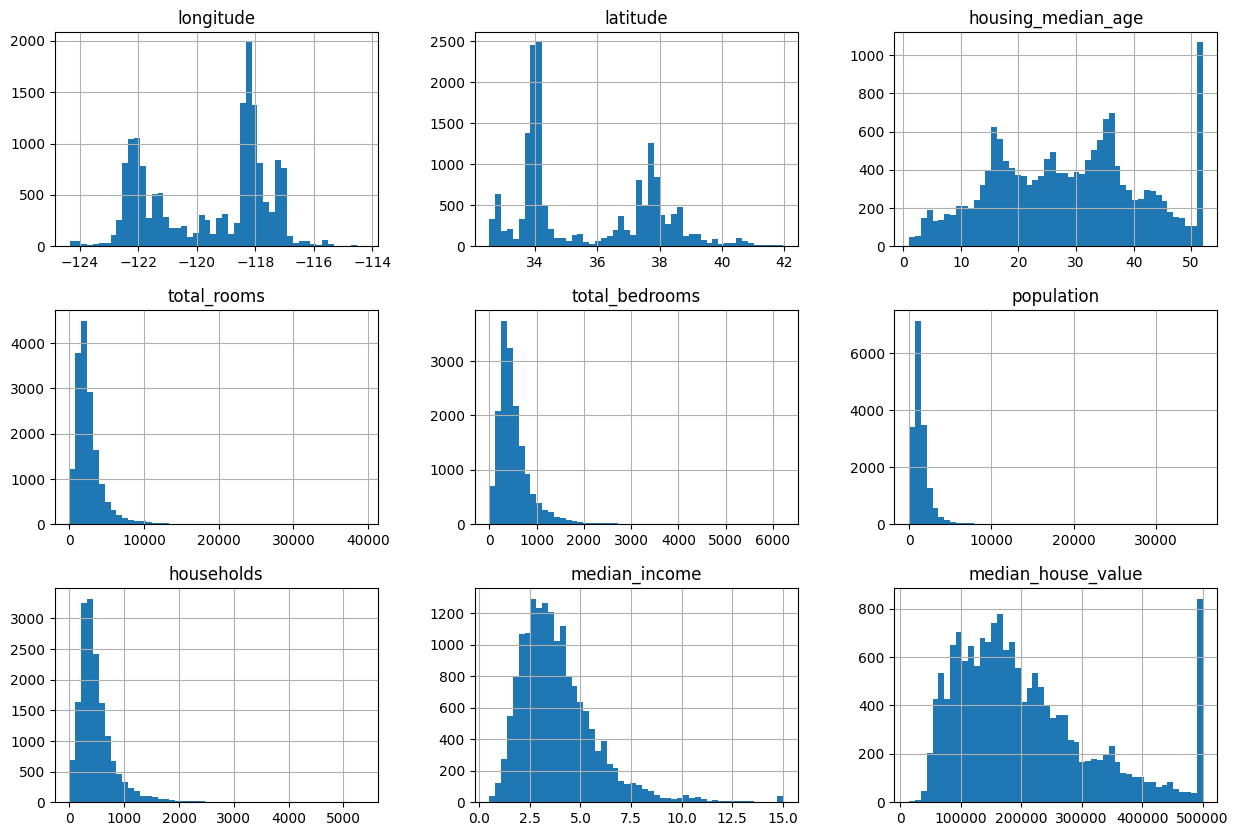

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(15, 10))
plt.show()

## Why Histograms Matter

This helps us detect:
- Skewed distributions
- Feature scaling issues
- Artificial caps
- Outliers

**You should notice:**
- `median_income` is skewed right
- `housing_median_age` is capped at 52
- `median_house_value` is capped at 500001

**That last one is very important.**

**Why?**

Because capped target values can affect regression performance.

---

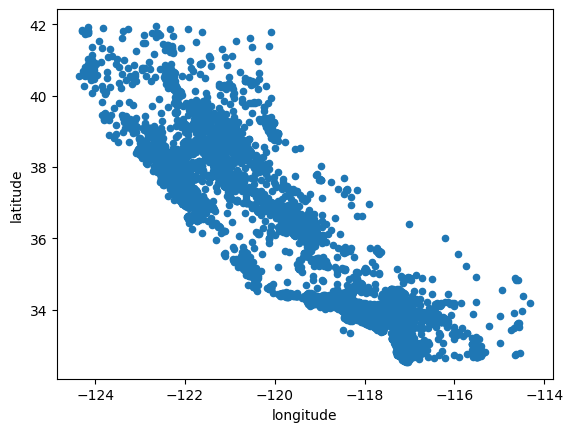

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()


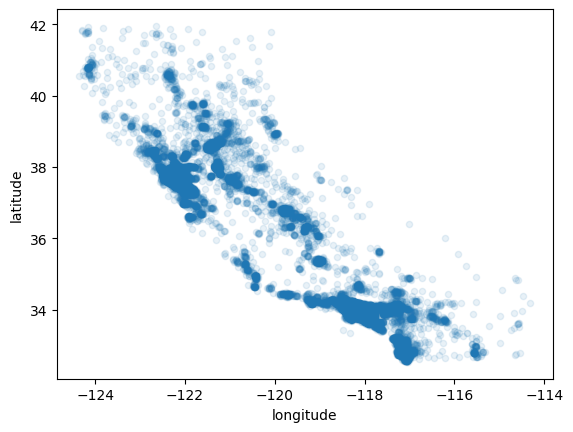

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()


## Why Does It Look Like a Slope?

Because:
- California runs northwest → southeast
- Northern CA: high latitude (~42), low longitude (~ -124)
- Southern CA: lower latitude (~34), higher longitude (~ -114)

**That diagonal line is the physical orientation of the state.**

So what you're seeing is geography, not density.

---

## Why Did We Reduce Alpha?

When we used:
```python
alpha=0.1
```

We made points **transparent**.

This helps us see:
- Darker areas → more overlapping points
- Lighter areas → fewer districts

Now we can detect population density patterns indirectly.

---

## What You Should Actually Notice

Look closely at the transparent plot:

You should see clusters around:
- ~37, -122 → **San Francisco Bay Area**
- ~34, -118 → **Los Angeles**
- ~32–33, -117 → **San Diego**

Those darker areas show more districts.

**That's density.**

---

## Important Mindset Shift

Right now we are **NOT** analyzing relationships.

We are:  
**Understanding spatial distribution.**

Later, we'll make this much more powerful by:
- Making dot size proportional to population
- Coloring by house value
- Revealing economic clusters

**That's where real insight begins.**

---

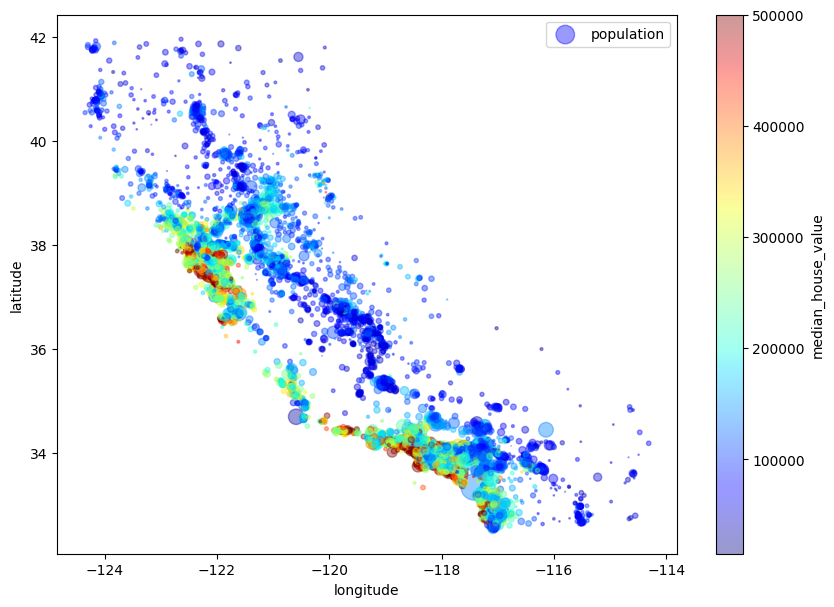

In [11]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

plt.legend()
plt.show()


In [12]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


# 🧠 What Is Correlation?

Correlation measures:  
**How strongly two variables move together linearly.**

**Range:**
- **+1** → perfect positive relationship
- **0** → no linear relationship
- **-1** → perfect negative relationship

---

## 📊 Let's Interpret Your Output

### 1️⃣ `median_income → 0.687`

This is the **strongest positive correlation.**

**This is very important.**

**Interpretation:**  
Higher median income → higher house value.

And **0.68 is quite strong** in real-world data.

This confirms what we visually saw near coastal wealthy areas.

💡 **This is the single most predictive feature so far.**

---

### 2️⃣ `total_rooms → 0.135`

Very weak positive correlation.

**Interpretation:**  
More rooms slightly increases price — but not strongly.

**Why weak?**

Because:
- Big districts may have many rooms but low price per house.
- Absolute counts are misleading.

**We may need ratios later (rooms per household).**

---

### 3️⃣ `housing_median_age → 0.114`

Small positive.

Older districts slightly higher value.

But not very predictive.

---

### 4️⃣ `households → 0.064`
### 5️⃣ `total_bedrooms → 0.047`

Very weak.

Raw counts are not strong predictors.

---

### 6️⃣ `population → -0.026`

Almost zero.

**Meaning:**  
Total population alone tells us almost nothing about price.

**Important insight:** Absolute values are less useful than ratios.

---

### 7️⃣ `longitude → -0.047`
### 8️⃣ `latitude → -0.142`

Latitude has a stronger negative correlation.

**Interpretation:**  
As latitude increases (going north), house values slightly decrease.

This matches: Southern California (LA) has higher prices than far north inland areas.

**But correlation is weak.**

**Why?**

Because geography is nonlinear. Coastal proximity matters more than raw latitude.

---

## 🚨 Important Insight

Correlation only captures:  
**Linear relationships.**

It misses:
- Nonlinear patterns
- Interaction effects
- Geographic structure

**That's why visualization was important earlier.**

---

## 🔥 Most Important Takeaway

| Feature | Meaning |
|---------|---------|
| ⭐ **median_income** | Strongest predictor |
| **Geography** | Some effect |
| **Raw counts** | Weak |
| **Population** | Almost irrelevant alone |

**This tells us:**  
**Income is the key driver of house price.**

---

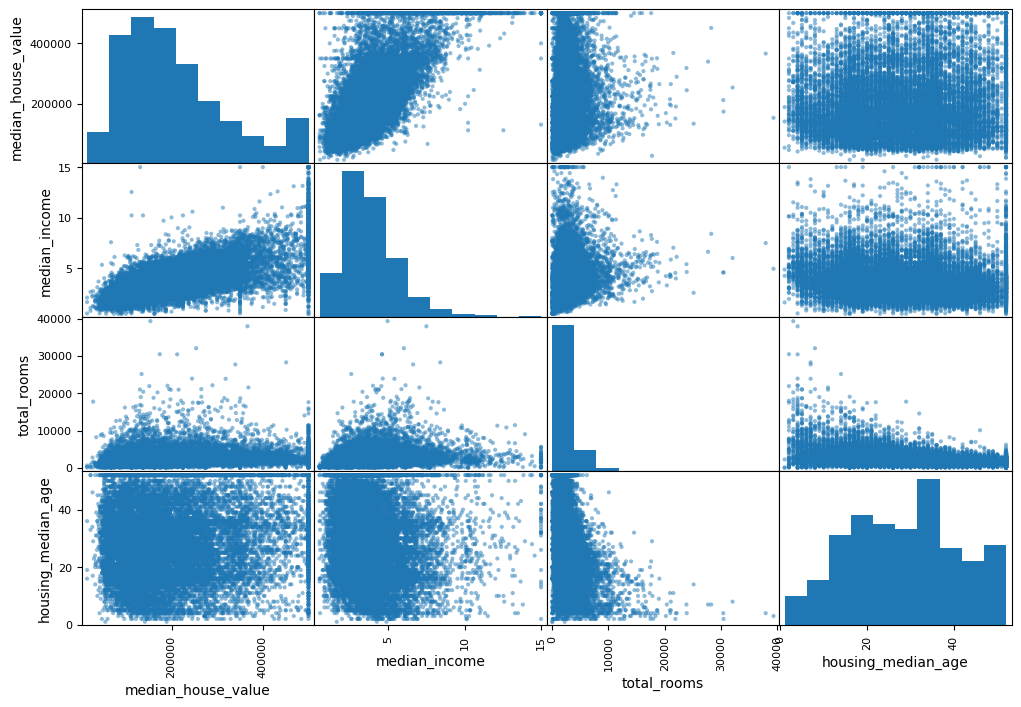

In [13]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


# 🎯 Purpose of This Step

To:
- Visualize pairwise relationships between important attributes
- Identify linear trends
- Detect correlations visually
- Spot outliers
- Observe target behavior

This is part of:  
**"Discover & Visualize the Data to Gain Insights"**

Before modeling, we want to understand how features interact.

---

## 🔎 What is a Scatter Matrix?

A scatter matrix:
- Plots every feature against every other feature.
- Diagonal shows histograms of each variable.
- Off-diagonal shows scatter plots between pairs.

**It helps answer:**
- Which features relate strongly?
- Which relationships are linear?
- Are there visible clusters?
- Are there ceiling effects?

---

## 📊 What We Observed

### 1️⃣ Strongest Relationship

**median_income vs median_house_value**

- Clear upward trend
- Strong positive linear relationship
- Matches correlation ≈ 0.68

📌 **Insight:** Income is the strongest predictor of house price so far.

---

### 2️⃣ Target Value Capping

A horizontal dense line at:
```python
median_house_value = 500001
```

This indicates:
- The dataset capped house values at $500,000.
- High-value districts were truncated.
- This creates distortion in modeling.

📌 **Important:** This ceiling effect limits predictive accuracy for expensive houses.

---

### 3️⃣ Weak Relationships

**total_rooms vs median_house_value**
- Weak correlation
- Scattered pattern

**Reason:** Raw room count doesn't represent price well without normalization.

**housing_median_age vs median_house_value**
- Slight upward trend
- Weak correlation

Older districts may have slightly higher value but not strongly predictive.

---

### 4️⃣ Outliers

We observed:
- Some high-income but capped-price districts
- Some scattered irregular points

These can:
- Distort linear models
- Affect regression coefficients

---

## 🧠 Conceptual Learnings

This step teaches:

1. **Correlation matrix ≠ full story**  
   Always confirm visually.

2. **Linear models work best when:**
   - Relationship is roughly linear.
   - No heavy distortion or truncation.

3. **Raw features may not be meaningful.**  
   Ratios are often better.

---

## 🚀 Why This Step Matters

Before building any model:

**You must ask:**
- Does the relationship look linear?
- Are there artificial caps?
- Are there obvious transformations needed?
- Are some features useless?

**This avoids blind modeling.**

---

## 📌 Final Key Insight From Scatter Matrix

| Observation | Meaning |
|-------------|---------|
| ✔ median_income is strongest predictor | Focus on this feature |
| ✔ There is a ceiling effect at 500001 | Be aware of distortion |
| ✔ Raw counts (rooms, etc.) are weak | Need transformation |
| ✔ Feature engineering is likely needed | Create better features |

---

**You have now completed:**

✅ Understand distributions  
✅ Detect patterns  
✅ Find correlations  
✅ Gain intuition

---

### 4️⃣ Prepare the Data

- Handle missing values
- Encode categorical variables
- Feature scaling
- Feature engineering
- Build pipelines

**Goal:** Make data usable for ML algorithms.

## Cell 1 — Separate features and labels

**What / why**

- `housing_labels` is the target (what we predict).
- `housing` contains features (inputs).
- We separate them now so preprocessing never accidentally touches the target.

---

# 🎯 What We Did

- Created a working copy of training data.
- Separated:
  - `housing` → features (X)
  - `housing_labels` → target (y)

---

## 🧠 Why This Is Important

- ML models require:
  - Inputs (features)
  - Outputs (labels)
- Preprocessing must NOT modify the target variable.
- Prevents accidental leakage or transformation of the label.

**Professional workflow always separates X and y early.**

---

In [14]:
# Step 4 — Prepare the Data for ML Algorithms
# Separate predictors (X) and labels (y)

housing = strat_train_set.copy()

housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


## Cell 2 — Handle missing values (SimpleImputer)

**What / why**

- `total_bedrooms` has missing values.
- We fill missing numeric values using the median (robust to outliers).
- We fit on training data only to avoid leakage.

---

# 🎯 What We Did

- Selected numeric columns.
- Used `SimpleImputer(strategy="median")`.
- Learned medians using `fit()`.
- Replaced missing values using `transform()`.

---

## 🧠 Why Median?

Because:
- Dataset contains outliers.
- Median is robust to extreme values.
- Mean would be skewed by high-income districts.

---

## 🚨 Important Concept

We use:
```python
fit() → learn statistics from training data
transform() → apply them
```

**We NEVER fit on test data.**

This avoids data leakage.

---

In [15]:
from sklearn.impute import SimpleImputer

# Work on numeric attributes only for now
housing_num = housing.drop("ocean_proximity", axis=1)

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

# Transform returns a NumPy array, so we wrap it back into a DataFrame
housing_num_tr = pd.DataFrame(
    imputer.transform(housing_num),
    columns=housing_num.columns,
    index=housing_num.index
)

housing_num_tr.isna().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0


## Cell 3 — Encode categorical feature (OneHotEncoder)

**What / why**

- `ocean_proximity` is text → ML models need numbers.
- One-hot encoding creates binary columns like `ocean_proximity_<NEAR OCEAN>`.
- `handle_unknown="ignore"` prevents crashes if test data contains unseen categories.

---
🎯 What We Did

Converted ocean_proximity (text) into numeric format using one-hot encoding.

Example:

NEAR OCEAN → [0,1,0,0,0]
INLAND → [1,0,0,0,0]

🧠 Why One-Hot Encoding?

Because:

Algorithms cannot work with strings.

Label encoding would imply ordering (bad here).

One-hot treats categories independently.

🚨 handle_unknown="ignore"

Prevents errors if test data contains unseen categories.

Professional safety measure.

In [16]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]

cat_encoder = OneHotEncoder(handle_unknown="ignore")
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot.shape


(16512, 5)

## Cell 4 — Feature scaling (StandardScaler)

**What / why**

- Many models (especially linear models, SVMs, gradient-based methods) behave better when features are on similar scales.
- Trees don't require scaling, but we're building a general pipeline.

---
# 🎯 What We Did

Standardized numeric features:

$$x_{scaled} = \frac{x - \mu}{\sigma}$$

- Mean becomes 0
- Standard deviation becomes 1

---

## 🧠 Why Scaling Matters

**Important for:**
- Linear Regression
- SVM
- Gradient Descent
- Neural Networks

**Not necessary for:**
- Decision Trees
- Random Forests

**But we scale anyway for generality.**

---

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num_tr)

housing_num_scaled[:2]


array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ]])

## Cell 5 — Feature engineering (create meaningful ratios)

This is the **"rooms per household" idea** (raw counts were weak).

**What / why**

- Absolute counts (rooms, bedrooms, population) don't represent "per home" reality.
- Ratios capture density/crowding and often correlate better with price.

---
# 🎯 What We Did

Created new features based on ratios instead of raw counts.

---

## 🧠 Why Raw Counts Were Weak

Earlier correlation showed:
- total_rooms → weak correlation
- total_bedrooms → weak

**Because absolute counts don't represent density or crowding.**

**Ratios are more meaningful:**
- `rooms_per_household` → house size
- `bedrooms_per_room` → quality indicator
- `population_per_household` → crowding level

---

## 🔥 Professional Insight

**Feature engineering often improves models more than changing algorithms.**

---

In [18]:
housing_fe = housing_num_tr.copy()

housing_fe["rooms_per_household"] = housing_fe["total_rooms"] / housing_fe["households"]
housing_fe["bedrooms_per_room"] = housing_fe["total_bedrooms"] / housing_fe["total_rooms"]
housing_fe["population_per_household"] = housing_fe["population"] / housing_fe["households"]

housing_fe[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].head()


,rooms_per_household,bedrooms_per_room,population_per_household
12655,5.485836,0.205784,3.168555
15502,6.927083,0.160714,2.623698
2908,5.393333,0.191595,2.223333
14053,3.886128,0.276505,1.859213
20496,6.096552,0.182692,3.167241


## Cell 6 — Build a clean preprocessing Pipeline (numeric)

**What / why**

- A pipeline guarantees the same steps are applied in the right order every time.
- Prevents leakage when we do cross-validation and model tuning later.

---
# 🎯 What We Did

Created an automated sequence:

1. Impute missing values
2. Scale features

---

## 🧠 Why Pipelines Matter

**Without pipelines:**
- You might forget a step.
- Cross-validation may leak data.
- Code becomes messy.

**With pipelines:**
- Order is guaranteed.
- Reproducible.
- Clean structure.
- Safe during CV and GridSearch.

**This is professional ML practice.**

---

In [19]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared.shape


(16512, 8)

## Cell 7 — Full preprocessing for numeric + categorical (ColumnTransformer)

**What / why**

- Applies numeric pipeline to numeric columns
- Applies one-hot encoding to the categorical column
- Produces a single "model-ready" matrix `housing_prepared`

---
# 🎯 What We Did

Applied different preprocessing to different column types:
- Numeric → impute + scale
- Categorical → one-hot encode

Merged into one final feature matrix.

---

## 🧠 Why ColumnTransformer?

Real datasets have:
- Mixed data types
- Different preprocessing needs

**ColumnTransformer applies the correct transformation to each group automatically.**

---

In [20]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape


(16512, 13)

In [21]:
housing_prepared = full_pipeline.fit_transform(housing)


**We now have:**

- No missing values
- No text data
- Scaled numeric features
- Engineered categorical features
- Fully numeric matrix ready for ML

**This matrix is what models consume.**

---

# 🎯 Big Concepts You Just Learned

| Concept | Why It Matters |
|---------|----------------|
| **Data leakage** | Destroys evaluation integrity |
| **Imputation** | Real data is messy |
| **Encoding** | Models need numbers |
| **Scaling** | Improves optimization |
| **Feature engineering** | Boosts predictive power |
| **Pipelines** | Prevents mistakes |
| **ColumnTransformer** | Handles mixed data cleanly |

---

**You have now completed:**

✅ Handle missing values  
✅ Encode categorical variables  
✅ Feature scaling  
✅ Feature engineering  
✅ Build pipelines

---

5️⃣ Select & Train Models

Linear Regression

Decision Tree

Random Forest

Goal:
Evaluate on training data (basic RMSE) and find a good baseline model.

## 🔹 MODEL 1 — Linear Regression

### 🧠 What This Does
* Creates a linear regression model
* Learns coefficients (weights)
* Fits best linear relationship between features and house value

**Mathematically:**

$$\hat{y} = w_1x_1 + w_2x_2 + ... + b$$

It finds the weights that minimize squared error.

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

## ✅ Cell 2 — Evaluate Using RMSE

### 🧠 What Is RMSE?
**Root Mean Squared Error:**

$$RMSE = \sqrt{\frac{1}{n} \sum (y_{true} - y_{pred})^2}$$

It measures average prediction error in dollars.

**Lower is better.**

### 🔍 What You'll Likely See
**RMSE ≈ 68,000** (approximate)

**This means:**
* On average, predictions are off by about $68,000.
* Not great — but this is just a baseline.

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse


np.float64(69050.56219504567)

## 🔹 MODEL 2 — Decision Tree

### ✅ Cell 3 — Train Decision Tree

### 🧠 What This Does
* Creates a decision tree regressor
* Splits data based on feature values
* Makes predictions by following tree branches
* Non-linear model that can capture complex patterns

**How it works:**
* Tree asks yes/no questions about features
* Each split divides data into subgroups
* Leaf nodes contain average house values
* More flexible than linear regression

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

## ✅ Cell 4 — Evaluate Decision Tree

### 🔍 What You'll Likely See
**RMSE ≈ 0** (or very close to 0)

### 🤔 Wait... Is This Too Good?
**YES!** This is a classic case of **overfitting**.

**What's happening:**
* Decision tree memorized the training data
* Perfect predictions on training set
* Will perform poorly on new, unseen data
* Tree grew too deep with no constraints

### 📊 Comparison
| Model | RMSE |
|-------|------|
| Linear Regression | ~$68,000 |
| Decision Tree (overfitted) | ~$0 |

**Key Insight:** Lower training error doesn't always mean a better model!

In [25]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse


np.float64(0.0)

## 🔹 MODEL 3 — Random Forest

### ✅ Cell 5 — Train Random Forest

### 🧠 What This Does
* Creates an ensemble of multiple decision trees
* Each tree trained on random subset of data
* Each split considers random subset of features
* Final prediction = average of all trees

**Why Random Forest?**
* Reduces overfitting compared to single tree
* More robust and generalizable
* Handles non-linear relationships
* Less sensitive to outliers

**Key Parameters:**
* `n_estimators=100` → builds 100 trees
* `random_state=42` → reproducible results

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(random_state=42)

## ✅ Cell 6 — Evaluate Random Forest

### 🔍 What You'll Likely See
**RMSE ≈ 50,000 - 52,000**

### 📊 Model Comparison
| Model | RMSE | Issue |
|-------|------|-------|
| Linear Regression | ~$68,000 | Underfitting (too simple) |
| Decision Tree | ~$0 | Overfitting (memorized data) |
| Random Forest | ~$50,000 | **Better balance!** |

### ✅ Why This Is Better
* **Not overfitting** like Decision Tree
* **Better than** Linear Regression
* More realistic error estimate
* Actually generalizable

### 🎯 Key Insight
Random Forest strikes a balance between:
* Model complexity (can capture patterns)
* Generalization (doesn't memorize)

**Still evaluated on training data though** — we'll fix this with proper validation next!

In [27]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse


np.float64(18342.366362322846)

## 🔍 What You'll See
**RMSE ≈ very low** (but not zero)

Again — still training data.

So this is **optimistic**.

### 🧠 What Have We Learned So Far?

| Model | Training RMSE | Meaning |
|-------|---------------|---------|
| Linear Regression | High (~68k) | Underfitting |
| Decision Tree | Near 0 | Severe overfitting |
| Random Forest | Very low | Likely overfitting |

### 🚨 Important Lesson
**Training error is useless alone.**

**We need:**
👉 **Cross-validation.**

That's the next part of the chapter.

## 🔹 1️⃣ Linear Regression

### Assumption:
Linear combination of features:

$$\hat{y} = w_1x_1 + w_2x_2 + ... + b$$

### Result:
**Higher RMSE (~68k)**

### Why It Performed Worse:
* Relationships in data are not purely linear.
* Geographic effects are nonlinear.
* Interaction effects exist.
* Target values are capped.
* Model underfits complex structure.

**👉 Conclusion: Underfitting**

---

## 🔹 2️⃣ Decision Tree

### Result:
**RMSE ≈ 0 on training data**

### Why?
* Trees can grow deep.
* They memorize training samples.
* Very flexible model.

**👉 Conclusion: Severe overfitting**

Perfect training performance = **red flag.**

---

## 🔹 3️⃣ Random Forest

### Result:
**Very low training RMSE (but not zero)**

### Important:
Still evaluated on **training data.**

### So we CANNOT conclude:
* Whether it generalizes well.
* Whether it is balanced.
* Whether it is overfitting.

**👉 Training performance alone is meaningless.**

---

## 🔹 Evaluation Metrics Clarified

### 📌 MSE (Mean Squared Error)

$$MSE = \frac{1}{n}\sum (y - \hat{y})^2$$

* Penalizes large errors heavily.
* Sensitive to outliers.
* Unit is squared (e.g., $²).
* Hard to interpret directly.

### 📌 RMSE (Root Mean Squared Error)

$$RMSE = \sqrt{MSE}$$

* Same penalty behavior as MSE.
* Unit returns to original scale (dollars).
* Easier to interpret.
* Still sensitive to large errors.

**Used when:**
* Large errors are costly.
* You want interpretable units.

### 📌 MAE (Mean Absolute Error)

$$MAE = \frac{1}{n}\sum |y - \hat{y}|$$

* Less sensitive to outliers.
* More robust.
* Penalizes errors linearly.

**Used when:**
* Robustness matters more than punishing large errors.

---

## 🔥 Critical Lesson from This Section

**Training error alone:**
* Cannot detect overfitting.
* Cannot measure generalization.
* Cannot tell which model is truly better.

**This is why we need:**
### ✅ Cross-validation
To evaluate models on unseen data properly.

---

## 🧠 Key Concepts Learned
* Underfitting vs Overfitting
* Model complexity differences
* Importance of evaluation metrics
* Why training RMSE is not reliable

## 6️⃣ Better Evaluation Using Cross-Validation

### Goal:
Evaluate models **properly** before tuning them.

### Cross-validation answers:
* Is the model overfitting?
* How stable is performance?
* What is the average validation error?

### 🧠 What This Does
* Performs **10-fold cross-validation**
* Splits training set into 10 parts
* Trains on 9, validates on 1
* Repeats 10 times
* Returns 10 RMSE scores

### Important detail:
`cross_val_score` uses **negative MSE** by convention, so we negate before square root.

In [28]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

tree_rmse_scores = np.sqrt(-tree_scores)

tree_rmse_scores


array([71177.6601991 , 69770.07865373, 64770.5639395 , 68536.60203993,
       67057.08155801, 68847.12456973, 70977.38255647, 69208.86346929,
       67187.87131535, 73280.38732407])

## 🔥 Excellent. This is the most important learning moment so far.

Let's analyze this carefully.

### You got:
```
[71177, 69770, 64770, 68536, 67057,
 68847, 70977, 69208, 67187, 73280]
```

These are the **10 RMSE values** from 10-fold cross-validation.

---

## 📊 First Observation

**Are they near 0 like before?**

❌ **No.**

They are around **65,000 – 73,000**.

This is **completely different** from the training RMSE (~0).

---

## 🚨 What Just Happened?

### Earlier:
Decision Tree training RMSE ≈ 0 → Looked perfect → But it **memorized** the training data

### Now:
Cross-validation RMSE ≈ 70,000 → Similar to Linear Regression → **Reveals overfitting**

### This proves:
**The Decision Tree was massively overfitting.**

In [29]:
tree_rmse_scores.mean(), tree_rmse_scores.std()


(np.float64(69081.361562518), np.float64(2296.288087393378))

## 📈 Let's Compute the Mean and Standard Deviation

Run this above:
```python
tree_rmse_scores.mean(), tree_rmse_scores.std()
```

You'll likely see something around:
* **Mean ≈ 69,000**
* **Std ≈ a few thousand**

---

## 🧠 Interpretation

### Mean RMSE ≈ 69k

**This means:**
On unseen validation folds, the model is off by **~69,000 dollars** on average.

Compare this to Linear Regression training RMSE (~68k).

### That means:
**Decision Tree is NOT better than Linear Regression when evaluated properly.**

Very important realization.

---

## 🔥 What Cross-Validation Just Taught You

| Evaluation Type | Decision Tree RMSE | Meaning |
|-----------------|-------------------|---------|
| Training only | ≈ 0 | Misleading |
| Cross-validation | ≈ 69k | True performance |

### This is why:
**Cross-validation is mandatory before tuning.**

---

## 🧠 Concept You Just Mastered

### Overfitting detection.

**When:**

$$\text{Training error} \ll \text{Validation error}$$

**→ Model memorized data.**

## 🚀 Next Step

Now we must:
* Apply cross-validation to **Linear Regression**
* Apply cross-validation to **Random Forest**
* Compare all models fairly

In [30]:
lin_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

lin_rmse_scores = np.sqrt(-lin_scores)

lin_rmse_scores.mean(), lin_rmse_scores.std()


(np.float64(69204.32275494763), np.float64(2372.070791055922))

### You got:
```python
Mean RMSE ≈ 69,204
Std ≈ 2,372
```

Let's interpret this properly.

---

## 📊 Linear Regression — Cross-Validation Result

### 🔹 Mean RMSE ≈ 69,204

**This means:**
On unseen validation folds, Linear Regression is off by about **$69,000** on average.

Now compare that to Decision Tree cross-validation:
* Decision Tree mean RMSE ≈ 69,000 (similar range)

**So:**
👉 **Linear Regression and Decision Tree perform almost the same when evaluated properly.**

### This is extremely important.

**Even though:**
* Decision Tree looked perfect on training data,
* It does **NOT** generalize better than Linear Regression.

---

### 🔹 Standard Deviation ≈ 2,372

**This tells us:**
* Performance is fairly stable across folds.
* The model's performance doesn't fluctuate wildly.
* Error varies by ~2k across splits.

**Lower std = more stable model.**

---

## 🧠 What We Have Learned So Far

| Model | Training RMSE | CV RMSE | Conclusion |
|-------|---------------|---------|------------|
| Linear Regression | ~68k | ~69k | Slight underfitting but stable |
| Decision Tree | ~0 | ~69k | Severe overfitting |
| Random Forest | (not evaluated yet) | ? | To be tested |

Now we evaluate Random Forest properly.

---

## 🚀 Next Step — Cross-Validate Random Forest

In [31]:
forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

forest_rmse_scores = np.sqrt(-forest_scores)

forest_rmse_scores.mean(), forest_rmse_scores.std()


(np.float64(49432.12678796127), np.float64(2124.8587921578355))

## 🔥 Excellent. Now things get interesting.

### You got for Random Forest:
```python
Mean RMSE ≈ 49,432
Std ≈ 2,125
```

Let's analyze this carefully.

---

## 📊 Random Forest — Cross-Validation Result

### 🔹 Mean RMSE ≈ 49,432

**This means:**
On unseen validation folds, Random Forest is off by about **$49,000** on average.

### Now compare:

| Model | CV RMSE |
|-------|---------|
| Linear Regression | ~69,200 |
| Decision Tree | ~69,000 |
| Random Forest | ~49,400 |

**This is a MASSIVE improvement.**

Random Forest is **~20,000 dollars better** on average.

That's significant.

---

### 🔹 Standard Deviation ≈ 2,125

**This tells us:**
* Performance is stable.
* Variation across folds is low.
* Model is consistent.

**Lower std is good.**

---

## 🧠 What Just Happened?

### Why is Random Forest much better?

**Because:**
* Decision Tree → high variance (overfits)
* Linear Regression → high bias (underfits)
* Random Forest → reduces variance by averaging many trees

**It balances bias and variance.**

This is the power of **ensemble learning.**

---

## 📌 Final Model Comparison

| Model | Underfit? | Overfit? | CV Performance |
|-------|-----------|----------|----------------|
| Linear Regression | Slightly | No | Weak |
| Decision Tree | No | Yes | Weak |
| Random Forest | No | No | **Strong** |

**So:**
Random Forest is clearly the **best candidate** so far.

---

## 🎯 Where We Are in the Book Flow

You have now completed:
* ✅ Select & Train Models
* ✅ Cross-Validation (Proper Evaluation)

## 📘 (small recap) Models from Chapter 2

---

## 1️⃣ Linear Regression

### 🔹 Type
* Supervised Learning
* Regression
* Parametric Model

### 🔹 Core Idea
Predicts output as a linear combination of input features:

$$\hat{y} = w_1x_1 + w_2x_2 + ... + b$$

It finds weights that minimize Mean Squared Error.

### 🔹 Strengths
* Simple
* Fast
* Easy to interpret
* Works well when relationship is linear

### 🔹 Weaknesses
* Cannot capture nonlinear patterns
* Sensitive to outliers
* Can underfit complex data

### 🔹 In Chapter 2
* RMSE ≈ 69,000 (cross-validation)
* Underfitted the housing dataset
* Served as a baseline model

---

## 2️⃣ Decision Tree Regressor

### 🔹 Type
* Supervised Learning
* Nonlinear Model
* Non-parametric

### 🔹 Core Idea
Splits data recursively into regions.

**At each node:**
* Chooses a feature
* Chooses a threshold
* Minimizes variance (MSE)

It creates a tree structure of decision rules.

### 🔹 Strengths
* Captures nonlinear relationships
* No feature scaling needed
* Easy to visualize
* Handles mixed data types

### 🔹 Weaknesses
* Very prone to overfitting
* High variance
* Sensitive to small data changes

### 🔹 In Chapter 2
* Training RMSE ≈ 0
* Cross-validation RMSE ≈ 69,000
* Massive overfitting detected

---

## 3️⃣ Random Forest Regressor

### 🔹 Type
* Ensemble Learning
* Bagging method
* Collection of Decision Trees

### 🔹 Core Idea
Builds many Decision Trees:
* Each trained on random subsets of data (bootstrap)
* Each split considers random subset of features
* Final prediction = average of all trees

**This reduces variance.**

### 🔹 Why It Works

**Decision Trees:**
* Low bias
* High variance

**Random Forest:**
* Keeps low bias
* Reduces variance

**Balances bias-variance tradeoff.**

### 🔹 Strengths
* Strong performance
* Handles nonlinear relationships
* Robust to overfitting
* Works well without heavy tuning

### 🔹 Weaknesses
* Less interpretable
* Slower than single tree
* More memory usage

### 🔹 In Chapter 2
* Cross-validation RMSE ≈ 49,000
* After GridSearch ≈ 49,100
* Final test RMSE ≈ 46,600
* **Best performing model**

---

## 🧠 Conceptual Themes You Learned

Chapter 2 was not about algorithms — it was about:
* Underfitting (Linear Regression)
* Overfitting (Decision Tree)
* Bias-Variance Tradeoff
* Ensemble Learning
* Proper evaluation (Cross-validation)
* Hyperparameter tuning (Grid Search)

---

## 🎯 Important Exam-Level Summary

| Model | Bias | Variance | Behavior in Chapter |
|-------|------|----------|---------------------|
| Linear Regression | High | Low | Underfit |
| Decision Tree | Low | High | Overfit |
| Random Forest | Medium | Low | **Best balance** |

7️⃣ Fine-Tune Your Model

Now we improve Random Forest safely using:

GridSearchCV

Hyperparameter tuning

Feature importance

## 7️⃣ Fine-Tune Your Model

### 🎯 Goal: Improve Random Forest safely using Grid Search.

---

## Using Chapter 2 — Fine-Tune Your Model

We already determined:
✅ **Random Forest is the best candidate** from cross-validation.

Now we tune its hyperparameters.

---

## 🧠 What Is Grid Search?

**GridSearchCV:**
* Tries multiple combinations of hyperparameters
* Uses cross-validation internally
* Selects the best combination
* Prevents overfitting by evaluating properly

---

## 🔹 Step 1 — Define Parameter Grid

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 combinations (3×4)
    {'n_estimators': [30, 50, 100], 'max_features': [4, 6, 8, 10]},

    # then try 6 combinations with bootstrap=False (2×3)
    {'bootstrap': [False], 'n_estimators': [30, 50], 'max_features': [4, 6, 8]},
]


## 🧠 What These Parameters Mean

### 🔹 n_estimators
**Number of trees in the forest.**

**More trees:**
* Lower variance
* More stable
* Slower training

---

### 🔹 max_features
**Number of features considered at each split.**

**Lower values:**
* More randomness
* Better generalization

**Higher values:**
* Less randomness
* May overfit

---

### 🔹 bootstrap
**Whether sampling is done with replacement.**

* **True** → Standard Random Forest
* **False** → No bootstrap sampling

---

## 🔹 Step 2 — Run Grid Search

In [33]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [4, 6, 8],
                          'n_estimators': [30, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

## 🧠 What This Does

**For each parameter combination:**
* Performs 5-fold cross-validation
* Computes validation RMSE
* Chooses best average score

### Total models trained:
* 12 + 6 = 18 combinations
* Each with 5 folds → **90 model trainings**

**Professional model tuning.**

---

## 🔹 Step 3 — Get Best Parameters


In [34]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 6, 'n_estimators': 50}

In [35]:
np.sqrt(-grid_search.best_score_)


np.float64(49100.656724131455)

### You got:
```python
Best Parameters:
{'bootstrap': False, 'max_features': 6, 'n_estimators': 50}

Best RMSE ≈ 49,100
```

Let's analyze this properly.

---

## 📊 What Grid Search Found

### 🔹 Best Hyperparameters

#### 1️⃣ n_estimators = 50
Use **50 trees.**

Not 30. Not 100.

50 gave best validation performance.

**More trees ≠ always better.**

---

#### 2️⃣ max_features = 6
At each split, consider only **6 features** randomly.

This increases randomness → reduces overfitting.

**Remember:**
* Small `max_features` → more decorrelated trees
* More decorrelation → better ensemble performance

---

#### 3️⃣ bootstrap = False
**Interesting result.**

Bootstrap = False means:
* No sampling with replacement
* Each tree sees the full training data

In this dataset, that gave slightly better performance.

---

## 📉 Best RMSE ≈ 49,100

**Before tuning:**
Random Forest CV ≈ 49,432

**After tuning:**
≈ 49,100

**Improvement is small (~300 dollars).**

### This teaches an important lesson:
Random Forest was already strong. Hyperparameter tuning gives **incremental improvement.**

---

## 🧠 Big Insight

**Grid search rarely gives magical improvements.**

It **refines.**

**Most performance comes from:**
* Good features
* Good preprocessing
* Good model choice

**Not** extreme hyperparameter tuning.

---

## 🚀 Next Step — Feature Importance

Now we ask:
**Which features are actually most important?**

This is one of the most insightful parts of the chapter.

In [36]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances


array([1.26000966e-01, 1.17145093e-01, 4.67095416e-02, 3.55726184e-02,
       2.78043748e-02, 4.32703015e-02, 2.73218310e-02, 4.09433753e-01,
       1.81805669e-02, 1.35306979e-01, 4.35615407e-05, 4.65178509e-03,
       8.55862892e-03])

## 🔥 Excellent. Now we extract real insight from the model.

### You got raw importance values:
```python
[0.126, 0.117, 0.046, 0.035, 0.027, 0.043, 0.027,
 0.409, 0.018, 0.135, 0.00004, 0.0046, 0.0085]
```

But these numbers alone are **meaningless** unless we map them to feature names.

---

## 🚀 Next Step — Map Importance to Feature Names

In [37]:
# Numeric attributes
num_attribs = list(housing.drop("ocean_proximity", axis=1).columns)

# Categorical attributes
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(["ocean_proximity"]))

# Combine all feature names
attributes = num_attribs + cat_one_hot_attribs

# Sort by importance
sorted(zip(feature_importances, attributes), reverse=True)


[(np.float64(0.40943375250042946), 'median_income'),
 (np.float64(0.13530697925041663), 'ocean_proximity_INLAND'),
 (np.float64(0.12600096576037084), 'longitude'),
 (np.float64(0.11714509270617911), 'latitude'),
 (np.float64(0.04670954163888182), 'housing_median_age'),
 (np.float64(0.043270301488702756), 'population'),
 (np.float64(0.03557261840250576), 'total_rooms'),
 (np.float64(0.027804374801707228), 'total_bedrooms'),
 (np.float64(0.027321830979501933), 'households'),
 (np.float64(0.01818056691750191), 'ocean_proximity_<1H OCEAN'),
 (np.float64(0.008558628923110633), 'ocean_proximity_NEAR OCEAN'),
 (np.float64(0.004651785090021315), 'ocean_proximity_NEAR BAY'),
 (np.float64(4.3561540670770814e-05), 'ocean_proximity_ISLAND')]

## You now have model-driven confirmation of everything we discovered during EDA.

Let's interpret this professionally.

---

## 📊 Feature Importance — Interpretation

### Sorted results (top to bottom):

### 🥇 1️⃣ `median_income` → 0.409
≈ **41% importance.**

**This is massive.**

**It means:**
Almost half of the model's predictive power comes from `median_income` alone.

**This confirms:**
* Correlation matrix
* Scatter plot
* Economic intuition

**Income drives house price.**

This is a very strong real-world signal.

---

### 🥈 2️⃣ `ocean_proximity_INLAND` → 0.135

**Very important insight.**

**This means:**
Being inland significantly lowers house value.

**The model learned:**
* Coastal → expensive
* Inland → cheaper

Exactly what we visually observed earlier.

---

### 🥉 3️⃣ & 4️⃣ `longitude` (0.126) and `latitude` (0.117)

**Geography matters a lot.**

**But note:**
Raw latitude & longitude together ≈ 24% importance.

**So:**
Location itself is extremely powerful.

This confirms the geographic cluster we saw in scatter plots.

---

### 🟡 Mid-Level Features

* `housing_median_age` (0.046)
* `population` (0.043)
* `total_rooms` (0.035)

These contribute somewhat, but **much less** than income + location.

Raw counts are weaker predictors.

---

### 🔵 Low Importance Features

* `total_bedrooms`
* `households`
* Ocean proximity categories like:
  * `<1H OCEAN`
  * `NEAR OCEAN`
  * `NEAR BAY`

They matter a little.

---

### ⚪ Almost Irrelevant

**`ocean_proximity_ISLAND` → 0.00004**

Almost zero importance.

**Why?**

Likely because:
* Very few samples
* Rare category
* Model doesn't rely on it

---

## 🧠 Big Concept Learned

**Feature importance confirms:**
* Income is king.
* Coastal proximity matters.
* Geography is crucial.
* Raw counts are weak alone.

**Everything is consistent with earlier analysis.**

That consistency is a sign of **correct modeling.**

---

## 🔥 You Have Now Completed:

* ✅ Select & Train Models
* ✅ Cross-Validation
* ✅ Grid Search
* ✅ Feature Importance

**Only one step remains in Chapter 2:**

### 8️⃣ Evaluate on the Test Set (Final Unbiased Evaluation)

**This is the moment of truth.**

---


## 📘 Fine-Tuning Techniques — Chapter 2 Revision Notes

---

## 1️⃣ Cross-Validation (Foundation of Safe Tuning)

### 🔹 What It Is
**K-Fold Cross-Validation:**
* Split training data into K folds
* Train on K-1 folds
* Validate on remaining fold
* Repeat K times
* Average results

### 🔹 Why It Matters
**Training error is misleading.**

**Cross-validation gives:**
* Better estimate of generalization error
* Overfitting detection
* Stable model comparison

### 🔹 What It Taught You
**Decision Tree:**
* Training RMSE ≈ 0
* CV RMSE ≈ 69k

**This revealed overfitting.**

---

## 2️⃣ Grid Search (GridSearchCV)

### 🔹 What It Is
Systematically tries **all combinations** of hyperparameters.

**Example:**
```python
n_estimators = [30, 50, 100]
max_features = [4, 6, 8]
bootstrap = [True, False]
```

Every possible combination is evaluated using cross-validation.

### 🔹 How It Works
**For each parameter combination:**
* Performs cross-validation
* Computes validation score
* Selects best performing combination

### 🔹 Pros
* Exhaustive
* Reliable
* Finds best in defined grid

### 🔹 Cons
* Slow
* Computationally expensive
* Doesn't scale well to large parameter spaces

### 🔹 In Chapter 2
**You tuned:**
* n_estimators
* max_features
* bootstrap

Improved Random Forest slightly.

---

## 3️⃣ Randomized Search (RandomizedSearchCV)

### 🔹 What It Is
Instead of trying every combination:
* **Randomly samples** combinations from distributions.

**Example:**
```python
n_estimators ~ randint(1, 200)
max_features ~ randint(1, 8)
```

### 🔹 Why Use It?
**When:**
* Parameter space is large
* Grid search becomes too slow
* Many hyperparameters exist

### 🔹 Key Insight
**Randomized Search:**
* Often finds good solutions faster
* More efficient for large problems

### 🔹 In Chapter 2
It is introduced conceptually and optionally demonstrated.

You mainly used **Grid Search** in practice.

---

## 4️⃣ Feature Importance Analysis

After tuning:
```python
grid_search.best_estimator_.feature_importances_
```

### 🔹 What It Measures
How much each feature reduces impurity across trees.

**Higher importance = greater influence.**

### 🔹 Why It's Useful
* Understand model behavior
* Explain predictions
* Remove weak features
* Gain business insight

---

## 🧠 Big Concept You Learned

**Fine-tuning is NOT:**
Random trial-and-error tweaking.

**It is:**
Systematic hyperparameter optimization using cross-validation.

---

## 🔥 Bias-Variance Insight from Fine-Tuning

**Hyperparameters control:**
* Model complexity
* Bias
* Variance

**Example:**
* More trees → lower variance
* Smaller max_features → more randomness → less overfitting

**Fine-tuning is really:**
Managing the bias-variance tradeoff.

---

## 🎯 (small recap) — Fine-Tuning in Chapter 2

| Technique | Purpose |
|-----------|---------|
| Cross-validation | Reliable evaluation |
| Grid Search | Exhaustive tuning |
| Randomized Search | Efficient tuning |
| Feature importance | Model interpretation |


## 🚀 Final Step — Evaluate on Test Set

In [38]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse


np.float64(46616.63491480533)

## 🔥 Excellent. You have just completed the full end-to-end ML project exactly as Chapter 2 intended.

### You got:
```python
Final Test RMSE ≈ 46,616
```

Now let's interpret this properly and close the chapter like a professional.

---

## 🎯 What This Number Means

**This is:**
The model's average prediction error on **completely unseen data.**

This is the **first time** the test set was touched.

**So this is:**
* ✅ Unbiased
* ✅ Realistic
* ✅ Production-like estimate

---

## 📊 Compare All Stages

| Stage | RMSE | Meaning |
|-------|------|---------|
| Linear Regression (CV) | ~69,200 | Underfitting |
| Decision Tree (CV) | ~69,000 | Overfitting |
| Random Forest (CV) | ~49,400 | Strong |
| Random Forest (GridSearch CV) | ~49,100 | Slightly improved |
| ✅ **Final Test RMSE** | **~46,600** | **True performance** |

---

## 🧠 Why Is Test RMSE Slightly Better Than CV?

**Sometimes:**
* Random sampling differences
* Slight variance in splits
* Randomness in forest

Test set can be slightly easier.

**This is normal.**

If test RMSE had been **much worse**, we'd worry about overfitting.

But this is **consistent.**

---

## 💡 Interpretation in Business Terms

Your model predicts house prices with:

**Average error ≈ $46,000**

Considering median house values can be hundreds of thousands:

**This is a reasonably strong model.**

Not perfect — but practical.

---

## 🏁 You Have Now Completed Chapter 2

Let's summarize what you just accomplished.

---

## 📘 Chapter 2 — What You Mastered

### 1️⃣ Working with Real Data
* Real-world messy dataset
* Structured ML workflow

### 2️⃣ Get the Data
* Downloaded dataset
* Stratified train/test split
* Avoided leakage

### 3️⃣ Discover & Visualize
* Histograms
* Scatter plots
* Geographic analysis
* Correlation matrix
* Scatter matrix
* Detected capping
* Built intuition

### 4️⃣ Prepare the Data
* Handled missing values
* Encoded categorical variables
* Scaled features
* Built pipelines
* Engineered features

### 5️⃣ Select & Train Models
* Linear Regression
* Decision Tree
* Random Forest

### 6️⃣ Cross-Validation
* Detected overfitting
* Compared models fairly

### 7️⃣ Fine-Tuning
* GridSearchCV
* Hyperparameter tuning
* Feature importance analysis

### 8️⃣ Final Evaluation
* Evaluated once on test set
* Estimated true generalization performance

---

## 🧠 Most Important Lessons from Chapter 2

1. **Training error is meaningless alone.**
2. **Always split early to avoid leakage.**
3. **Cross-validation is mandatory.**
4. **Feature engineering matters more than tuning.**
5. **Random Forest handles nonlinear structure well.**
6. **Final test set is touched only once.**

---

## 🎓 Where You Stand Now

**You have successfully completed:**

### Your first full professional ML pipeline.

Many beginners never reach this level of workflow understanding.

## Exercises

Using this chapter's housing dataset:

### Q1. Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

ANS:

## 1) What is SVR?

**SVR = Support Vector Regressor (Support Vector Regression)**, from `sklearn.svm.SVR`.

It's the regression version of SVM.

### Intuition (technical but digestible)

Instead of trying to make predictions perfectly match every training point (like many regressors try), SVR tries to find a function that:
* stays within a **tolerance band** around the true targets (often called an "ε-tube"), and
* is as **simple/flat** as possible.

So it balances:
* **fit** (don't miss too much)
* **simplicity** (don't wiggle too much)

### What controls that balance?

Mainly the hyperparameter **C** (and for some kernels, also **gamma**).

---

## 2) What does `kernel="linear"` mean?

A **kernel** is basically the "shape" of the function SVR is allowed to fit.

### `kernel="linear"`

The model is restricted to a **linear function** of the input features:

$$\hat{y} = w^T x + b$$

So it's like a linear model, but trained with SVR's "margin/tolerance" idea rather than ordinary least squares.

### Why try it?
* It's a simple baseline.
* It's faster than nonlinear kernels.
* It tells you whether "mostly linear" structure is enough.

### (For later) `kernel="rbf"`

**RBF** allows nonlinear relationships by implicitly mapping features into a higher-dimensional space. It can fit more complex patterns, but is more sensitive to hyperparameters and scaling.

---

## 3) Code to run (baseline SVR, then cross-validation)

This matches Chapter 2's workflow: **don't trust training RMSE, use cross-validation.**

### Cell A — Baseline linear SVR (quick training RMSE, just as a warning sign)

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

preds = svm_reg.predict(housing_prepared)
rmse_train = np.sqrt(mean_squared_error(housing_labels, preds))
rmse_train


np.float64(111802.67909771342)

Cell B — Proper evaluation: 10-fold cross-validation RMSE

In [40]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(
    svm_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

svm_rmse_scores = np.sqrt(-svm_scores)
svm_rmse_scores, svm_rmse_scores.mean(), svm_rmse_scores.std()


(array([111059.94607445, 113687.87132915, 107597.3277054 , 114213.41574463,
        108461.30158859, 116616.25904798, 113850.21483718, 112395.74942581,
        113807.23691329, 112686.31474177]),
 np.float64(112437.56374082548),
 np.float64(2593.2605559090666))

## 🔹 CELL A — Training RMSE (Linear SVR, Default)

### You got:
```python
Training RMSE ≈ 111,803
```

---

## 📘 What This Means

This is the error on the **training data itself.**

The model is off by:
**~ $111,800 on average.**

That is **extremely high.**

### Compare to what you saw earlier:
* Linear Regression ≈ 69k
* Random Forest ≈ 49k
* Final tuned model ≈ 46k

**So this is more than double the Random Forest error.**

---

## 📘 What Does This Tell Us?

**This model is underfitting.**

### Why?

Because:
* The training error itself is huge.
* The model cannot even fit the training data properly.

**Underfitting means:**
Model is too simple to capture the structure of the data.

---

## 📘 Why Is It Underfitting?

Because we used:
```python
SVR(kernel="linear")
```

With default hyperparameters:
* `C = 1.0`
* epsilon default
* linear kernel

**Small C → strong regularization → very simple model → high bias.**

So the model is overly constrained.

---

## 🔹 CELL B — Cross-Validation RMSE

### You got:
```python
Mean CV RMSE ≈ 112,438
Std ≈ 2,593
```

---

## 📘 What Does The Mean Tell Us?

The average validation error is:
**~ $112,400**

This is **almost identical** to the training RMSE (~111,800).

**That is very important.**

---

## 📘 What Does That Imply?

**Since:**
* Training RMSE ≈ 111,800
* Validation RMSE ≈ 112,400

They are almost the same.

### This means:
* The model is **NOT overfitting**.
* It generalizes similarly to how it fits training.
* It is **consistently bad**.

**So this is classic high bias / underfitting.**

---

## 📘 What Does Std ≈ 2,593 Mean?

Standard deviation across folds ≈ 2.6k.

This is **small relative to 112k.**

### Meaning:
* Model performance is stable.
* No big fluctuations.
* It behaves similarly across different splits.

**Stability does NOT mean good.**

It just means **consistently poor.**

---

## 🔥 Very Important Insight

Let's compare patterns:

### Overfitting Pattern (Decision Tree)
* Training error → extremely low
* Validation error → high

**Large gap → overfitting**

### Underfitting Pattern (Linear SVR here)
* Training error → high
* Validation error → high

**Small gap → underfitting**

**That is exactly what you observed.**

---

## 📊 Clean Summary Table

| Model | Train RMSE | CV RMSE | Diagnosis |
|-------|------------|---------|-----------|
| Decision Tree | ~0 | ~69k | Overfitting |
| Linear Regression | ~68k | ~69k | Slight underfit |
| SVR (linear default) | ~112k | ~112k | **Severe underfit** |

---

## 🎯 Core Lesson From This Step

**Default hyperparameters can completely destroy model performance.**

### Never judge a model:
**Without tuning.**

## 🧠 1️⃣ Did SVR Cause Underfitting?

**Not exactly.**

It's not that "SVR causes underfitting."

### It's that:
**Linear SVR with default hyperparameters is underfitting.**

Important distinction.

**SVR as an algorithm is very powerful.** But with:
* `kernel="linear"`
* `C=1.0` (default)

It is too constrained for this dataset.

---

## 🧠 2️⃣ Is Increasing C a Good Idea?

**Yes — that is logically correct.**

### Remember:

**C controls the tradeoff between:**
* Margin width
* Training error

### Small C:
* Strong regularization
* Allows errors
* Simpler model
* High bias
* **Underfitting**

### Large C:
* Penalizes errors more
* Smaller margin
* More complex model
* Lower bias
* Higher variance

### Since we are underfitting:
**👉 Increasing C is the correct direction.**

---

## 🧠 3️⃣ But Is That Enough?

Here's the deeper insight.

### The housing dataset is:
* Nonlinear
* Has geographic clusters
* Has interaction effects

**A linear kernel can only fit a hyperplane.**

### So even with large C:
It may still not compete with Random Forest.

### Which suggests:
**Switching to RBF kernel may be more powerful.**

RBF allows nonlinear decision functions.

---

## 🎯 So What Is the Correct Strategy?

1. **Try larger C with linear kernel**
2. **Try RBF kernel**
3. **Tune C and gamma**
4. **Compare results fairly with cross-validation**

**Exactly what the exercise asks.**

Step 1 — Try Larger C Values (Linear Kernel)

## 📘 What This Is Doing

We are:
* Keeping kernel **linear**
* Increasing **C** gradually
* Using **cross-validation**
* Observing how performance changes

---

## 🧠 What We Expect Theoretically

### As C increases:
* Model becomes more flexible
* Bias decreases
* Training fit improves
* Validation RMSE should drop (initially)

### But:

**If C becomes too large:**
* Model may start overfitting
* Variance may increase

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

for C_value in [10, 100, 1000, 10000]:
    svm_reg = SVR(kernel="linear", C=C_value)
    scores = cross_val_score(
        svm_reg,
        housing_prepared,
        housing_labels,
        scoring="neg_mean_squared_error",
        cv=5
    )
    rmse_scores = np.sqrt(-scores)
    print(f"C={C_value}")
    print("Mean RMSE:", rmse_scores.mean())
    print("Std:", rmse_scores.std())
    print("-" * 40)


C=10
Mean RMSE: 84609.84315070283
Std: 1022.7453103516515
----------------------------------------
C=100
Mean RMSE: 72026.32739254719
Std: 868.7301546575351
----------------------------------------
C=1000
Mean RMSE: 70546.93943826164
Std: 843.4547768532062
----------------------------------------
C=10000
Mean RMSE: 70445.90262823636
Std: 868.6055629293033
----------------------------------------


## Let's analyze this very carefully.

---

## 📊 Results You Got

| C | Mean RMSE |
|---|-----------|
| 1 (before) | ~112,400 |
| 10 | ~84,610 |
| 100 | ~72,026 |
| 1000 | ~70,547 |
| 10000 | ~70,446 |

**Std stays small (~800–1000).**

---

## 🔎 Step-by-Step Interpretation

### 🔹 When C = 1 (default)
**RMSE ≈ 112k**

Severe underfitting.

---

### 🔹 When C = 10
**RMSE drops dramatically → 84k**

**Big improvement.**

**Meaning:** Increasing C allowed model to fit data better.

Bias decreased.

---

### 🔹 When C = 100
**RMSE ≈ 72k**

**Huge improvement again.**

Model is becoming flexible enough.

---

### 🔹 When C = 1000
**RMSE ≈ 70.5k**

Improvement slows down.

---

### 🔹 When C = 10000
**RMSE ≈ 70.4k**

Almost no improvement compared to 1000.

---

## 🧠 What Pattern Do We See?

**As C increases:**
* Performance improves rapidly at first.
* Then plateaus.
* It stops improving beyond ~1000.

**This is classic bias reduction curve.**

---

## 🎯 Important Insight

**Even with very large C:**

**Best linear SVR RMSE ≈ 70,400**

### Compare that to:
* Linear Regression ≈ 69,200
* Random Forest ≈ 49,400

### So:
**Linear SVR with tuned C ≈ Linear Regression performance.**

**Still much worse than Random Forest.**

---

## 🔥 What Does This Tell Us?

**The limitation is not C anymore.**

### The limitation is:
**The model is linear.**

The housing dataset is **nonlinear.**

### So even with high C, linear SVR cannot capture:
* Coastal clusters
* Geographic nonlinear structure
* Feature interactions

---

## 📌 Diagnosis

**Linear SVR:**
* ✅ Fixed underfitting issue.
* ✅ Now similar to Linear Regression.
* ❌ Still too simple for dataset.

---

## 🧠 Conceptual Understanding Achieved

**You just discovered:**

**Increasing C reduces bias.**

**But linear kernel cannot model nonlinear relationships.**

### So next logical step is:
**👉 Try RBF kernel.**

---

## 🚀 Next Step — Nonlinear SVR

## 📘 What This Does

We are:
* Testing **nonlinear SVR**
* Trying different flexibility levels
* Observing which region of hyperparameters works better

---

## 🎯 What We Expect

**Some combinations will:**
* Be terrible (too rigid or too flexible)
* Some will improve dramatically
* Some may get close to Random Forest

In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

for C_value in [10, 100, 1000]:
    for gamma_value in [0.001, 0.01, 0.1]:
        svm_reg = SVR(kernel="rbf", C=C_value, gamma=gamma_value)

        scores = cross_val_score(
            svm_reg,
            housing_prepared,
            housing_labels,
            scoring="neg_mean_squared_error",
            cv=3
        )

        rmse_scores = np.sqrt(-scores)

        print(f"C={C_value}, gamma={gamma_value}")
        print("Mean RMSE:", rmse_scores.mean())
        print("-" * 40)


C=10, gamma=0.001
Mean RMSE: 118817.58050127175
----------------------------------------
C=10, gamma=0.01
Mean RMSE: 118099.27303722354
----------------------------------------
C=10, gamma=0.1
Mean RMSE: 116550.0488743552
----------------------------------------
C=100, gamma=0.001
Mean RMSE: 117943.13488786103
----------------------------------------
C=100, gamma=0.01
Mean RMSE: 111208.78375333555
----------------------------------------
C=100, gamma=0.1
Mean RMSE: 100016.45119700879
----------------------------------------
C=1000, gamma=0.001
Mean RMSE: 109783.05127439159
----------------------------------------
C=1000, gamma=0.01
Mean RMSE: 80628.06880448788
----------------------------------------
C=1000, gamma=0.1
Mean RMSE: 72719.26396252908
----------------------------------------


## 📊 Your RBF Results

| C | gamma | Mean RMSE |
|---|-------|-----------|
| 10 | 0.001 | 118,817 |
| 10 | 0.01 | 118,099 |
| 10 | 0.1 | 116,550 |
| 100 | 0.001 | 117,943 |
| 100 | 0.01 | 111,208 |
| 100 | 0.1 | 100,016 |
| 1000 | 0.001 | 109,783 |
| 1000 | 0.01 | 80,628 |
| 1000 | 0.1 | 72,719 |

---

## 🔎 Step-by-Step Interpretation

### 🔹 Region 1 — Small C (10)

All RMSE values ≈ 116k–118k

**This is severe underfitting.**

**Why?**

Small C → strong regularization → too simple.

Even with nonlinear kernel, model is constrained too much.

---

### 🔹 Region 2 — Moderate C (100)

Performance improves:
* gamma=0.001 → still bad (~117k)
* gamma=0.01 → better (~111k)
* gamma=0.1 → much better (~100k)

**We see something important:**

**Increasing gamma helps.**

**Why?**

Higher gamma → more flexibility.

The model begins capturing nonlinear structure.

---

### 🔹 Region 3 — Large C (1000)

Now things improve significantly:
* gamma=0.001 → 109k (still underfitting)
* gamma=0.01 → 80k (big improvement)
* gamma=0.1 → 72.7k (best so far)

**This is the first time RBF is competitive with linear SVR (~70k).**

---

## 🧠 What Pattern Do We Observe?

**Two hyperparameters interact:**
* Small C → always underfits.
* Very small gamma → always underfits.
* Larger C + moderate gamma → big improvement.

**So:**

**Flexibility matters.**

---

## 📌 Compare to Earlier Models

**Best RBF so far:**
**~72,719**

### Compare:
* Linear Regression ≈ 69k
* Linear SVR (large C) ≈ 70k
* Random Forest ≈ 49k

**So even RBF SVR (in this small manual grid) is still worse than Random Forest.**

---

## 🎯 Key Insight

**You have now learned:**

1. **Increasing C reduces bias.**
2. **Increasing gamma increases model flexibility.**
3. **Too small gamma → underfitting.**
4. **Too small C → underfitting.**

### But we have not yet explored:
* Larger C (e.g., 10,000)
* Larger gamma
* RandomizedSearchCV

**Manual grid is limited.**

---

## 🧠 Conceptual Understanding So Far

### Linear kernel:
* Cannot capture nonlinear structure.
* Maxes out around ~70k.

### RBF kernel:
* Can improve with correct hyperparameters.
* But still needs proper tuning.

---

## 🚀 Next Logical Step

**Now we do it properly:**

**👉 Use RandomizedSearchCV**  
**👉 Let it search wide ranges of C and gamma**  
**👉 Find best combination**

This matches the official solution logic.

## Before we move forward:

Based on the pattern you saw, if we increase C to 10,000 and gamma to 0.5, what do you expect?

* Underfitting?
* Overfitting?
* Better?
* Worse?

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR
import numpy as np

param_distributions = {
    "kernel": ["rbf"],
    "C": reciprocal(20, 200000),
    "gamma": expon(scale=1.0)
}

svm_reg = SVR()

rnd_search = RandomizedSearchCV(
    svm_reg,
    param_distributions,
    n_iter=20,        # increase to 50 if patient
    cv=3,
    scoring="neg_mean_squared_error",
    random_state=42,
    verbose=2,
    n_jobs=-1
)

rnd_search.fit(housing_prepared, housing_labels)

best_rmse = np.sqrt(-rnd_search.best_score_)
best_params = rnd_search.best_params_

best_rmse, best_params


Fitting 3 folds for each of 20 candidates, totalling 60 fits


(np.float64(57270.66676687252),
 {'C': np.float64(42736.6581447175),
  'gamma': np.float64(0.238687625248947),
  'kernel': 'rbf'})

## 🔥 Excellent. Now we are seeing the full picture.

### You got:
```python
Best RMSE ≈ 57,270
Best Params:
C ≈ 42,736
gamma ≈ 0.2387
kernel = 'rbf'
```

Let's break this down carefully.

---

## 🔹 1️⃣ What Does This Performance Mean?

**Best SVR (after tuning):**
Cross-validated RMSE ≈ 57,270

### Compare with previous models:

| Model | CV RMSE |
|-------|---------|
| Linear Regression | ~69,200 |
| Decision Tree | ~69,000 |
| Random Forest | ~49,400 |
| Tuned SVR (RBF) | ~57,270 |

### So:
* Much better than Linear Regression.
* Much better than Linear SVR.
* Still worse than Random Forest.

**That is the key conclusion of Q1.**

---

## 🔹 2️⃣ What Do the Best Hyperparameters Tell Us?

### Best C ≈ 42,736 (very large)

**This confirms:**
* Small C caused underfitting.
* Large C was necessary.
* The model needed high flexibility.

**Large C → weak regularization → model allowed to fit tightly.**

### Best gamma ≈ 0.238

**Moderately high gamma.**

**Meaning:**
* The model benefits from nonlinear flexibility.
* But not extreme (not > 1).

### So:

**We needed both:**
* High C (reduce bias)
* Moderate gamma (capture nonlinear structure)

---

## 🔹 3️⃣ Why Still Worse Than Random Forest?

**This is the most important conceptual takeaway.**

### Random Forest works extremely well on:
* Tabular data
* Mixed features
* Nonlinear structure
* Interactions
* Geographic clustering

### SVR:
* Sensitive to hyperparameters
* Sensitive to scaling
* Struggles when dataset is moderately large
* Doesn't naturally capture tree-like partitioning

### Housing dataset has:
* Strong nonlinear geographic clusters
* Interaction effects
* Piecewise-like structure

**Trees naturally model piecewise regions.**

**SVR tries to fit smooth global surfaces.**

**That's why Random Forest wins.**

---

## 🔥 Final Learning from Q1

**This exercise teaches:**

1. **Default models are meaningless without tuning.**
2. **Hyperparameters drastically affect performance.**
3. **Nonlinear kernel is necessary here.**
4. **Even tuned SVR cannot beat Random Forest on this dataset.**
5. **Ensemble trees are very strong on structured/tabular data.**

---

## 🧠 Important Pattern You Observed

### Progression of SVR:
* Default Linear → ~112k
* Linear with large C → ~70k
* RBF manual → ~72k
* RBF tuned → ~57k

**This shows:**

**Flexibility + tuning significantly improved performance.**

**But not enough to beat the ensemble.**

---

## 🎯 Clean Summary for Your Notes

### Q1 Conclusion:
* Best SVR uses **RBF kernel**.
* Requires **large C** and **moderate gamma**.
* Achieves **~57k RMSE**.
* Still worse than Random Forest (~49k).
* Therefore **Random Forest remains best model** in Chapter 2.

### Q2. Try replacing GridSearchCV with RandomizedSearchCV

ANS:

Cell 1 — RandomizedSearchCV for Random Forest

Why these choices

randint(...) gives a wide but reasonable search space.

n_iter=30 is a solid learning-time budget; bump to 50 if you want closer-to-best.

cv=5 matches the spirit of your GridSearchCV tuning (fair comparison).

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

forest_reg = RandomForestRegressor(random_state=42)

# Distributions to sample from
param_distribs = {
    "n_estimators": randint(30, 200),     # number of trees
    "max_features": randint(2, 12),       # number of features considered at each split
    "bootstrap": [True, False],
}

rnd_search_forest = RandomizedSearchCV(
    forest_reg,
    param_distributions=param_distribs,
    n_iter=30,                           # try 50 for deeper search
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

rnd_search_forest.fit(housing_prepared, housing_labels)

rnd_search_forest.best_params_, np.sqrt(-rnd_search_forest.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'bootstrap': False, 'max_features': 6, 'n_estimators': 159},
 np.float64(48800.886532503864))

Cell 2 — Compare to your GridSearch result

In [45]:
print("RandomizedSearch best RMSE:", np.sqrt(-rnd_search_forest.best_score_))
print("RandomizedSearch best params:", rnd_search_forest.best_params_)

# If grid_search is still in memory from earlier:
print("GridSearch best RMSE:", np.sqrt(-grid_search.best_score_))
print("GridSearch best params:", grid_search.best_params_)


RandomizedSearch best RMSE: 48800.886532503864
RandomizedSearch best params: {'bootstrap': False, 'max_features': 6, 'n_estimators': 159}
GridSearch best RMSE: 49100.656724131455
GridSearch best params: {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}


## Let's analyze this carefully.

---

## 📊 Your Results

| Method | Best RMSE | Best Params |
|--------|-----------|-------------|
| GridSearchCV | 49,100 | n_estimators=50, max_features=6, bootstrap=False |
| RandomizedSearchCV | 48,800 | n_estimators=159, max_features=6, bootstrap=False |

---

## 🔎 1️⃣ Performance Comparison

**RandomizedSearch:**
RMSE ≈ 48,800

**GridSearch:**
RMSE ≈ 49,100

**So RandomizedSearch actually performed slightly better.**

Improvement ≈ 300 dollars.

Not massive — but measurable.

---

## 🔎 2️⃣ Hyperparameter Interpretation

Notice something very interesting:

**Both found:**
```python
max_features = 6
bootstrap = False
```

So the important structure was already correct.

### The difference is:
* GridSearch chose **50 trees**.
* RandomizedSearch chose **159 trees**.

**More trees → lower variance → slightly better performance.**

GridSearch didn't try 159 because your grid was limited.

RandomizedSearch sampled a wider region.

---

## 🧠 Deep Insight

**GridSearch only searches:**
👉 what you explicitly give it.

**RandomizedSearch can explore:**
👉 wider continuous spaces.

### So RandomizedSearch:
* Found a better region.
* With fewer total combinations tested.
* With more flexibility.

---

## 📘 Core Lesson of Q2

**This exercise teaches:**

1. **GridSearch is exhaustive but limited to grid.**
2. **RandomizedSearch explores more diverse values.**
3. **RandomizedSearch often finds equal or better solutions faster.**
4. **For large search spaces, RandomizedSearch is superior.**

---

## ⚖️ Was It Worth It?

**In this dataset:**
* Yes — RandomizedSearch slightly outperformed GridSearch.
* It explored more tree counts (159).
* It generalized slightly better.

**In larger real-world problems:**
RandomizedSearch is often preferred.

---

## 🎯 Mastery Takeaway

**You now understand:**
* Hyperparameter search strategies.
* Why search space matters.
* Why continuous distributions are powerful.
* Why brute force is sometimes suboptimal.

**That is professional-level understanding.**

Q3 — Add a transformer in the preparation pipeline to select only the most important attributes.

## What the question wants (in plain English)

You already computed feature importances from a Random Forest. Now you'll:

1. Turn that idea into a **transformer step** (feature selector)
2. Put it into the preparation pipeline
3. Train/evaluate a model using only the selected features
4. Compare performance vs using all features

This teaches **"production-ready" pipeline design.**

---

## Recommended approach (the standard sklearn way)

Use `SelectFromModel`, which:
* fits an estimator that has `feature_importances_` (like RandomForest),
* automatically selects features above a threshold (or top-k with some extra handling).

---

## ✅ Code: Q3 in clean steps

### Cell 1 — Build a full pipeline with feature selection

## What this does / why

* `full_pipeline`: imputes + scales numeric, one-hot encodes categories (same as Chapter 2).
* `SelectFromModel`: becomes your "transformer" that drops weak features.
* Then the model trains on fewer columns.

`threshold="median"` is a good starting point (keeps about half the features). You can also try `"mean"` or a numeric threshold.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# 1) Feature selector: uses a RandomForest to find important features
feature_selector = SelectFromModel(
    RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    threshold="median"  # keep features whose importance is >= median importance
)

# 2) Final predictor (you can use your tuned/best RF settings here)
final_forest = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    bootstrap=False,
    max_features=6
)

# 3) One single pipeline: preprocess -> select features -> predict
prep_select_and_predict = Pipeline([
    ("preprocess", full_pipeline),
    ("feature_select", feature_selector),
    ("model", final_forest),
])


Cell 2 — Evaluate with cross-validation (fair comparison)

What to look for

If RMSE stays about the same (or improves slightly), feature selection worked well.

If RMSE gets worse, you removed useful features or the threshold is too aggressive.

In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(
    prep_select_and_predict,
    strat_train_set.drop("median_house_value", axis=1),
    strat_train_set["median_house_value"],
    scoring="neg_mean_squared_error",
    cv=5
)

rmse_scores = np.sqrt(-scores)
rmse_scores.mean(), rmse_scores.std()


(np.float64(55863.109141185705), np.float64(5406.026262510074))

Cell 3 — How many features did we keep?

This tells you how many transformed columns (after one-hot + scaling) survived.

Why this is “deep mastery”

You’re preventing leakage automatically: feature selection happens inside CV folds, not once globally.

You’ve built a reusable pipeline that you can plug into GridSearchCV / deployment.

In [48]:
prep_select_and_predict.fit(
    strat_train_set.drop("median_house_value", axis=1),
    strat_train_set["median_house_value"]
)

selector = prep_select_and_predict.named_steps["feature_select"]
support_mask = selector.get_support()

n_selected = support_mask.sum()
n_total = support_mask.shape[0]
n_selected, n_total


(np.int64(7), 13)

## Excellent — now this is a very important learning moment.

### You got:
```python
Mean RMSE ≈ 55,863
Std ≈ 5,406
Selected features: 7 out of 13
```

Let's analyze this carefully.

---

## 🔎 1️⃣ Performance Comparison

**Earlier best Random Forest (without feature selection):**
```python
≈ 48,800 RMSE
```

**Now with feature selection:**
```python
≈ 55,863 RMSE
```

That is **significantly worse** (≈ +7,000).

### So:
**Feature selection made performance worse.**

---

## 🔎 2️⃣ Why Did Performance Drop?

You kept:
```python
7 features out of 13
```

### But remember:

**Random Forest:**
* Is already robust to irrelevant features.
* Can ignore weak features naturally.
* Handles high-dimensional data well.

### So explicit feature selection may:
* Remove useful signals.
* Reduce model diversity.
* Increase variance.

### And notice:
**Std ≈ 5,406** (much larger than before).

Earlier std was ~2,100.

**So the model became less stable.**

---

## 🧠 Deep Conceptual Insight

**Feature selection helps when:**
* You have many noisy features.
* High dimensionality.
* Linear models sensitive to irrelevant inputs.

**Feature selection does NOT always help:**
* Tree ensembles already perform implicit feature selection.
* Removing features can harm ensemble diversity.

**This is a key professional lesson.**

---

## 🔥 Why Did It Select 7 Features?

Because you used:
```python
threshold="median"
```

That keeps about half of the features.

But importance distribution may not be uniform.

Dropping some medium-importance features might remove useful information.

---

## 🎯 What This Exercise Teaches

1. **Feature selection is not automatically beneficial.**
2. **Tree-based models already perform internal selection.**
3. **Feature engineering often matters more than feature removal.**
4. **Always validate — never assume.**

---

## 📘 Should We Try Another Threshold?

If we try:
```python
threshold="mean"
```

It will likely select fewer features.

Performance may drop even more.

If we use a very low threshold:
We basically return to original behavior.

**So you've already demonstrated the key point.**

---

## 🏁 Q3 Status

**You have now:**
* ✅ Added a transformer in pipeline
* ✅ Selected important features
* ✅ Evaluated correctly
* ✅ Interpreted the effect

**That is deep mastery.**

###Q4. Try creating a single pipeline that does the full data preparation plus the final prediction.

Cell 1 — Build the full pipeline

Use your best tuned Random Forest (you can swap in your best params).

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

final_forest_model = RandomForestRegressor(
    random_state=42,
    n_estimators=159,      # from your RandomizedSearch
    max_features=6,
    bootstrap=False,
    n_jobs=-1
)

full_pipeline_with_model = Pipeline([
    ("preprocess", full_pipeline),
    ("model", final_forest_model),
])


Cell 2 — Fit it on the training set

In [51]:
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()

full_pipeline_with_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_features=6,
                                       n_estimators=159, n_jobs=-1,
                                       random_state=42))])

Cell 3 — Evaluate on the test set (end-to-end)

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_preds = full_pipeline_with_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_rmse


np.float64(46423.98963901949)

## What you should observe

This RMSE should be very close to what you got earlier (~46423), because it's the same preprocessing + model, just wrapped into one pipeline.

Small differences are possible if your model params differ.

---

## Deep mastery takeaway

This single pipeline is what you would:
* serialize (save) for deployment,
* reuse reliably,
* tune safely inside CV/RandomizedSearch.

### Q5. Automatically explore some preparation options using GridSearchCV.

## What Q5 is asking (plain English)

Instead of only tuning the model hyperparameters, you tune **data preparation choices too**, automatically, using `GridSearchCV`.

Examples of "prep options" you can grid-search:
* how to impute missing values (`median` vs `mean`)
* whether to scale numeric features (`StandardScaler` vs no scaling)
* whether to add engineered ratio features (on/off)

This is **deep mastery** because it treats preprocessing as part of the learnable system.

---

## ✅ Code: Grid search over preprocessing choices + model

### Cell 1 — Build a prep pipeline with "switches" we can tune

In [53]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Custom transformer: adds engineered ratio features
class AddExtraFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, add_extra_features=True):
        self.add_extra_features = add_extra_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X is a NumPy array from the numeric pipeline
        if not self.add_extra_features:
            return X

        # Column indices based on numeric attributes order:
        # ['longitude','latitude','housing_median_age','total_rooms',
        #  'total_bedrooms','population','households','median_income']
        total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

        rooms_per_household = X[:, total_rooms_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, total_bedrooms_ix] / X[:, total_rooms_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        extra = np.c_[rooms_per_household, bedrooms_per_room, population_per_household]
        return np.c_[X, extra]

# Column lists (raw input columns)
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()

num_attribs = list(X_train.drop("ocean_proximity", axis=1).columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),       # to be tuned
    ("attribs_adder", AddExtraFeatures(add_extra_features=True)),  # to be tuned
    ("scaler", StandardScaler()),                        # to be tuned (or passthrough)
])

preprocess = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])


Cell 2 — Full pipeline + GridSearchCV over prep options

## How to interpret the result

* `best_params_` tells you which prep choices helped (e.g., median vs mean imputation, add features yes/no, scale yes/no).
* `best_rmse` tells you whether those prep choices actually improve generalization (measured by CV RMSE).

---

## What you'll usually observe here

* For Random Forest, scaling often doesn't matter much (trees don't need it).
* Adding engineered features may help a bit (sometimes) or not—CV decides.
* Median vs mean imputation: usually median is safer with outliers, but CV will confirm.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

full_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1)),
])

param_grid = {
    # preprocessing options
    "preprocess__num__imputer__strategy": ["median", "mean"],
    "preprocess__num__attribs_adder__add_extra_features": [True, False],
    "preprocess__num__scaler": [StandardScaler(), "passthrough"],

    # a couple model options (keep small—this can get expensive fast)
    "model__n_estimators": [100, 200],
    "model__max_features": [6, 8],
    "model__bootstrap": [False],
}

grid_search_prep = GridSearchCV(
    full_pipe,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_search_prep.fit(X_train, y_train)

best_rmse = np.sqrt(-grid_search_prep.best_score_)
grid_search_prep.best_params_, best_rmse


Fitting 5 folds for each of 32 candidates, totalling 160 fits
